In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
df = pd.read_csv("Mall_Customers.csv")
df.drop('CustomerID',inplace=True,axis=1)

In [204]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [206]:
df.columns=['Gender','Age','Income','Score']

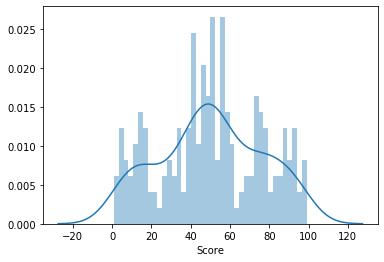

In [207]:
sns.distplot(df['Score'],bins=40)

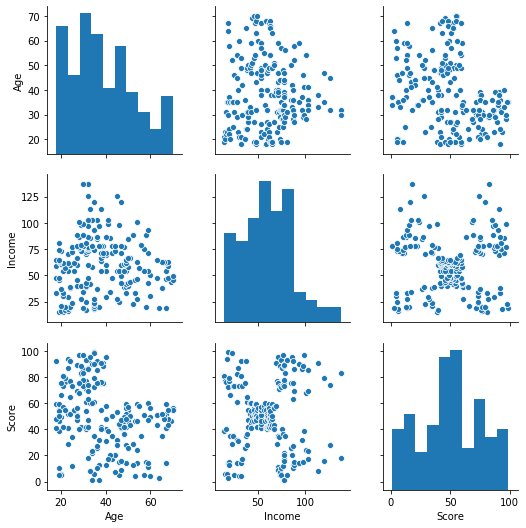

In [208]:
sns.pairplot(df)

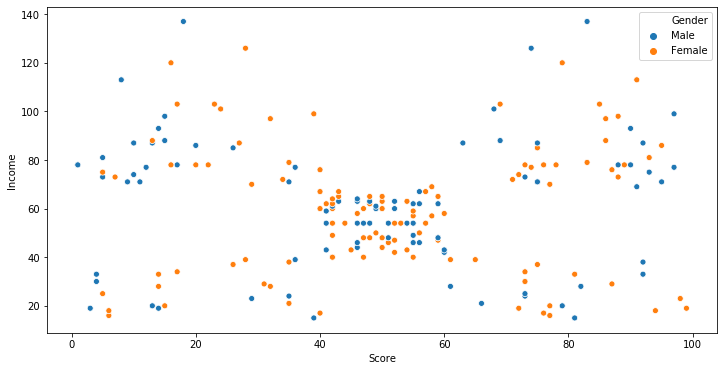

In [209]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Score',y='Income',data=df,hue='Gender')

In [210]:
df=pd.get_dummies(df,drop_first=True)

In [211]:
df.head()

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


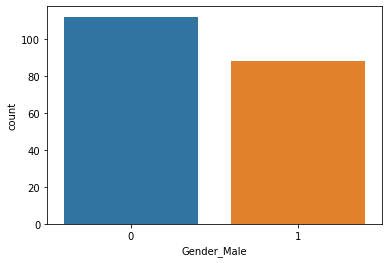

In [212]:
sns.countplot(df['Gender_Male'])

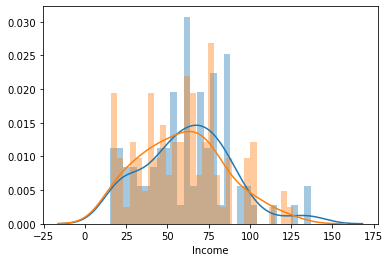

In [213]:
sns.distplot(df[df['Gender_Male']==1]['Income'],bins=30)
sns.distplot(df[df['Gender_Male']==0]['Income'],bins=30)

In [214]:
from sklearn.cluster import KMeans

In [215]:
Age=df[['Age' , 'Score']]
elbow=[]
for n in range(1 , 12):
    model = (KMeans(n_clusters = n,random_state= 0) )
    model= model.fit(Age)
    elbow.append(model.inertia_)

Text(0.5, 0, '# Cluster')

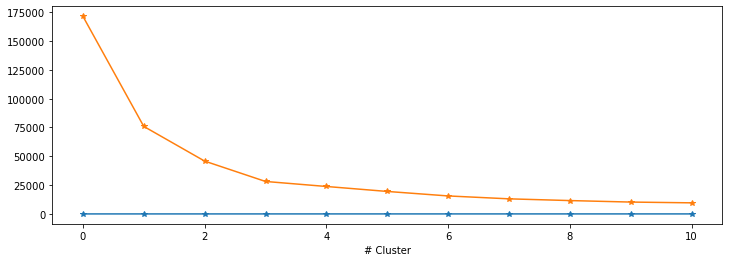

In [216]:
curve= [i for i in enumerate(elbow)]
plt.figure(figsize=(12,4))
plt.plot(curve,'-*')
plt.xlabel('# Cluster')

In [217]:
model = KMeans(n_clusters=3,random_state=0)
clusters=model.fit_predict(Income)
centroid=model.cluster_centers_

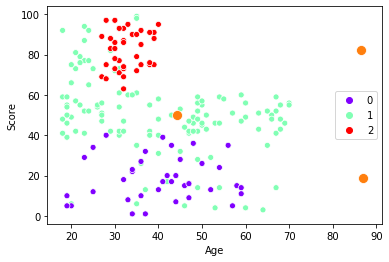

In [218]:
sns.scatterplot(x='Age',y='Score',data=df,hue=clusters,palette='rainbow')
sns.scatterplot(centroid[:,0],centroid[:,1],s= 100)

In [219]:
Income=df[['Income' , 'Score']]
elbow=[]
for n in range(1 , 12):
    model = (KMeans(n_clusters = n,random_state= 0) )
    model= model.fit(Income)
    elbow.append(model.inertia_)

Text(0.5, 0, '# Cluster')

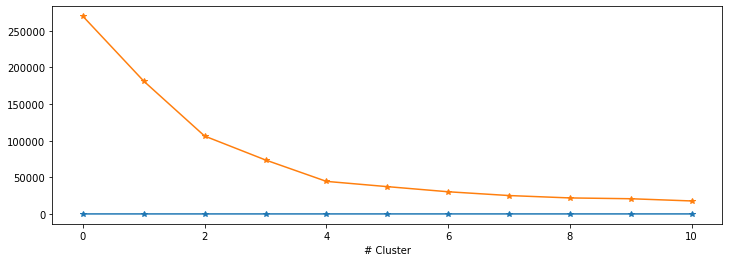

In [220]:
curve= [i for i in enumerate(elbow)]
plt.figure(figsize=(12,4))
plt.plot(curve,'-*')
plt.xlabel('# Cluster')

In [235]:
model = KMeans(n_clusters=5,random_state=0)
clusters=model.fit_predict(Income)
centroid=model.cluster_centers_

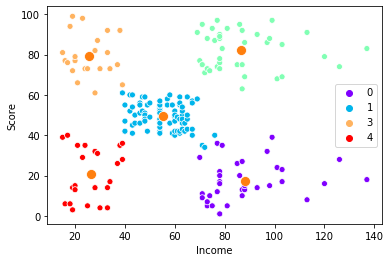

In [247]:
sns.scatterplot(x='Income',y='Score',data=df,hue=clusters,palette='rainbow')
sns.scatterplot(centroid[:,0],centroid[:,1],s= 100)

In [225]:
clusters=pd.DataFrame(clusters)
clusters.columns=['Clusters']

In [229]:
df=pd.concat([df,clusters],axis=1)

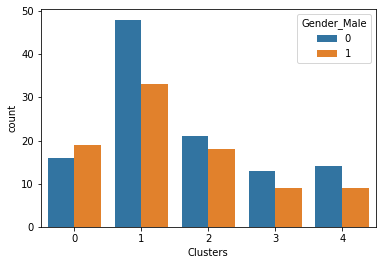

In [233]:
sns.countplot(df['Clusters'],hue=df['Gender_Male'])

In [259]:
mean=df.groupby('Clusters').mean()[['Income','Score']]

In [273]:
mean

,Income,Score
Clusters,,
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043
